In [1]:
import talib
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download historical market data
ticker = "SPY"
stock = yf.Ticker(ticker)

# get historical market data
hist = stock.history(period="3y")

In [3]:
# Download historical data as dataframe
spy_data = yf.download('SPY', start='2020-01-01', end='2023-06-30')

[*********************100%***********************]  1 of 1 completed


In [4]:
spy_data.to_csv('SPY_data.csv')

In [5]:
spy_df =pd.read_csv('SPY_data.csv',index_col=0,parse_dates=True)
spy_df.dropna()

spy_df.shape

(879, 6)

In [6]:
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,307.375702,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,305.048126,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,306.211945,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,305.350891,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,306.978271,68296000


(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07')])

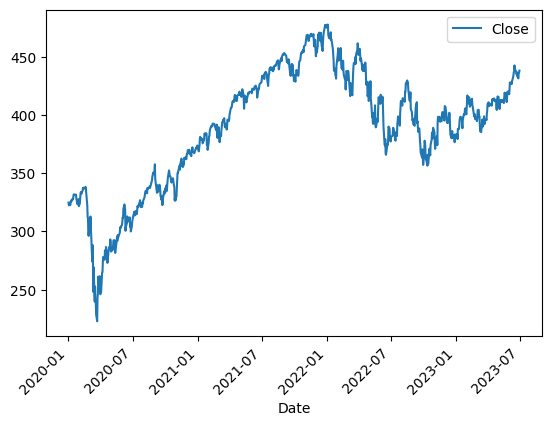

In [7]:
spy_df.plot(y='Close')
plt.xticks(rotation=45)

In [8]:
# Step 2: Feature Engineering
rsi_period = 14
spy_df['RSI'] = talib.RSI(spy_df['Close'], timeperiod = rsi_period)

In [9]:
spy_df.dropna(how='any', inplace=True) 

In [10]:
buy_threshold = 30
sell_threshold = 70
# if signal is giving 0 then no trade recommended .
spy_df['Signal'] = 0  # Initialize all signals as 0
spy_df.loc[spy_df['RSI'] < buy_threshold, 'Signal'] = 1  # Assign buy signal
spy_df.loc[spy_df['RSI'] > sell_threshold, 'Signal'] = -1  # Assign sell signal

In [11]:
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,Signal
Date,,,,,,,,
2020-01-23,330.630005,332.170013,329.410004,331.720001,313.856812,51963000,69.274020,0
2020-01-24,332.440002,332.529999,327.359985,328.769989,311.065643,87578400,58.767538,0
2020-01-27,323.029999,325.119995,322.660004,323.500000,306.079407,84062500,45.493409,0
2020-01-28,325.059998,327.850006,323.600006,326.890015,309.286926,63834000,52.868338,0
2020-01-29,328.380005,328.630005,326.399994,326.619995,309.031464,53888900,52.261781,0


In [12]:
X = spy_df['RSI'].values.reshape(-1, 1)  # Reshape to a 2D array if needed
y = spy_df['Signal'].values


In [13]:
# Step 4: Splitting Data - X as length of data excluding last row 
X = spy_df[['RSI']]
display(X)
X = X[:(len(spy_df)-1)]
display(X)
y = spy_df['Signal']
y=y[:int(len(spy_df)-1)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,RSI
Date,
2020-01-23,69.274020
2020-01-24,58.767538
2020-01-27,45.493409
2020-01-28,52.868338
2020-01-29,52.261781
...,...
2023-06-23,58.060143
2023-06-26,55.175454
2023-06-27,60.782984


,RSI
Date,
2020-01-23,69.274020
2020-01-24,58.767538
2020-01-27,45.493409
2020-01-28,52.868338
2020-01-29,52.261781
...,...
2023-06-22,63.838388
2023-06-23,58.060143
2023-06-26,55.175454


In [14]:
# Step 5: Model Selection
model = RandomForestClassifier()

In [15]:
# Step 6: Model Training
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
#Test the model
predictions = model.predict(X_train)
print('The model score is:',model.score(X_train,y_train))

The model score is: 1.0


In [17]:
#Make the prediction
new_data = spy_df[['RSI']].tail(1)
prediction_1 = model.predict(new_data)
print('The model predicts the last row or day to be:',prediction_1)
print('Actual value is:',spy_df[['Signal']].tail(1).values[0])


The model predicts the last row or day to be: [0]
Actual value is: [0]


In [18]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
print('The model score is:',model.score(X_test,y_test))
#print(f"Accuracy: {accuracy}")

The model score is: 1.0


In [19]:
print(y_pred)

[ 0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0
  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  1  0 -1  0  0  0  1 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1 -1  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0]


In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


In [21]:
print(list(y_test))
print(type(y_test))
print(y_pred)

[0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
<class 'pandas.core.series.Series'>
[ 0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0
  1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  1  0 -1  0  0  0  1 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1 -1  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [22]:
# Step 8: Signal Generation
last_data = spy_df[['RSI']].values[-1].reshape(1, -1)
predicted_label = model.predict(last_data)[0]
if predicted_label == 1:
    signal = 'Buy'
else:
    signal = 'Sell'
print(f"Signal: {signal}")

Signal: Sell


In [26]:
# Visualize exit position relative to total portfolio value
exit= spy_df[spy_df['Signal'] == -1.0]['RSI'].hvplot.scatter(
    color='red',
    marker='v',
    legend=False,
    ylabel='RSI signal',
    width=1000,
    height=400
)

entry = spy_df[spy_df['Signal'] == 1.0]['RSI'].hvplot.scatter(
    color='green',
    marker='^',
    ylabel='RSI signal',
    width=1000,
    height=400
)

# Visualize the value of the total portfolio
RSI = spy_df[['RSI']].hvplot(
    line_color='yellow',
    ylabel='RSI',
    xlabel='Date',
    width=1000,
    height=400
)



# Overlay the plots
entry_exit_plot = entry * exit*RSI
entry_exit_plot.opts(
    title="SPY Algorithm - RSI ['ENTRY/EXIT']",
    yformatter='%.0f'
)

:Overlay
   .Scatter.RSI.I  :Scatter   [Date]   (RSI)
   .Scatter.RSI.II :Scatter   [Date]   (RSI)
   .Curve.I        :Curve   [Date]   (RSI)